In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# List of x and y coordinates
data = pd.read_csv('housing.csv')
# sns.pairplot(data)

In [2]:
data = data.drop('LSTAT',axis=1)
data = data.drop('PTRATIO',axis=1)
sorted_set = data.sort_values(by=['RM'],ascending=True,inplace=True)
sorted_set = np.copy(data)
sorted_set.shape
feature = sorted_set[:]
value = sorted_set[:]
f = []
for frame in feature:
    f.append(frame[0])
v = []
for frame in feature:
    v.append(frame[1])
size = data.shape[0]

In [3]:
a = []
for i in range(data.shape[0]):
    a.append([f[i],v[i]])
  

In [4]:
# Calculate Dist. of point from line ay+bx+c=0 form
def calc_dist(a,b,c,x,y):
    p = (a*y) + (b*x) + c
    q = (a*a)+(b*b)
    q = np.sqrt(q)
    return abs(p/q)


# Divide DataSet and calculate e1/e2
def calc_error_ratio(size,k,m,c,pt):
    brk = int(size*k)
    error = 0
    for i in range(brk):
        offset = calc_dist(1,m,c,pt[i][0],pt[i][1])
        error = error + offset
    e1 = error/brk
    error = 0
    for i in range(brk+1, size):
        offset = calc_dist(1,m,c,pt[i][0],pt[i][1])
        error = error + offset
    e2 = error/(size-brk)
    return e1/e2

In [5]:
# Calculate Slope
def calc_slope(m,c,size,ratio,unit,a):
    m_act = m
    d_prv = 1-calc_error_ratio(size,ratio,m,c,a)
    d=d_prv
    # print("d is {} and d_prv is {}".format(d,d_prv))
    while(d>0.17):
        m=m+unit
        d=1-calc_error_ratio(size,ratio,m,c,a)
        m_act = m
        if(d>d_prv):
            # Terminate Looping and return previous value of m, Found best value of slope
            m_act = m - unit
            break;
        else:
            # Find other instance of m for a better suit
            d_prv = d
    
    return m_act,d

# Calculate Intercept
def calc_intercept(m,c,size,ratio,unit,a,d_prv):
    c_act = c
    d = d_prv
    while(d>0.15):
        c=c+unit
        d=1-calc_error_ratio(size,ratio,m,c,a)
        c_act = c
        if(d>d_prv):
            # Terminate Looping and return previous value of c, Found best value of intercept
            c_act = c - unit
            break;
        else:
            # Find other instance of c for a better suit
            d_prv = d
    
    return c_act

In [6]:
# Finding direction of movement for m
unit = 8
c=0
error_z,error_n,error_p = 0,0,0
m=0
for i in range(size):
        offset = calc_dist(1,m,c,a[i][0],a[i][1])
        error_z = error_z + offset
m=m+unit
for i in range(size):
        offset = calc_dist(1,m,c,a[i][0],a[i][1])
        error_p = error_p + offset

m=0
m=m-unit
for i in range(size):
        offset = calc_dist(1,m,c,a[i][0],a[i][1])
        error_n = error_n + offset
        
p = abs(error_z - error_p)
n = abs(error_z - error_n)
if(p>n):
    unit=-8
m=0

In [7]:
m_act,d = calc_slope(m,c,size,0.4,unit,a)
m_act

291408

In [8]:
# Finding direction of movement for c
unit = 0.1
error_z,error_n,error_p = 0,0,0
for i in range(size):
        offset = calc_dist(1,m_act,c,a[i][0],a[i][1])
        error_z = error_z + offset
c=c+unit
for i in range(size):
        offset = calc_dist(1,m_act,c,a[i][0],a[i][1])
        error_p = error_p + offset

c=0
c=c-unit
for i in range(size):
        offset = calc_dist(1,m_act,c,a[i][0],a[i][1])
        error_n = error_n + offset
        
p = abs(error_z - error_p)
n = abs(error_z - error_n)
if(p>n):
    unit=-0.1
c=0
c=c+unit

In [9]:
c_act= calc_intercept(m_act,c,size,0.4,unit,a,d)
c_act


def predict(x):
    y = x*m_act
    y = y + c_act
    return abs(y)

m_act

291408

In [18]:
# Predictor
x = np.float32(input("Enter feature : "))
y = predict(x)
y

Enter feature : 4.3


1253054.355581665

# Implementation

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [19]:
data = pd.read_csv('housing.csv')
data = data.drop('LSTAT',axis=1)
data = data.drop('PTRATIO',axis=1)
data.head(10)

,RM,MEDV
0,6.575,504000.0
1,6.421,453600.0
2,7.185,728700.0
3,6.998,701400.0
4,7.147,760200.0
5,6.430,602700.0
6,6.012,480900.0
7,6.172,569100.0
8,5.631,346500.0
9,6.004,396900.0


In [20]:
data.corr()

,RM,MEDV
RM,1.000000,0.697209
MEDV,0.697209,1.000000


In [22]:
x = data[['RM']]
y = data[['MEDV']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
X_train.shape[0]

342

In [23]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

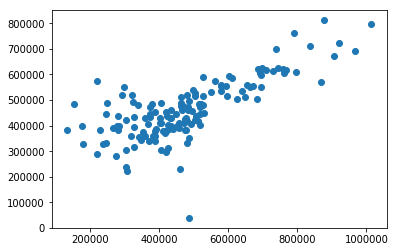

In [24]:
predictions = lm.predict(X_test) #has all the predicted price
plt.scatter(y_test, predictions)

In [26]:
a = np.float32(input("Enter RM "))
data = [[a]]
print("Price is : {}".format(lm.predict(data)))

Enter RM 4.3
Price is : [[115138.32013507]]
